In [214]:
#libraries 
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import random
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [216]:
model = Sequential()

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [5]:
#import images
cat_folder = 'C:/Users/Claire Robinson/Downloads/AdvancedDS/Cat'
dog_folder = 'C:/Users/Claire Robinson/Downloads/AdvancedDS/Dog'

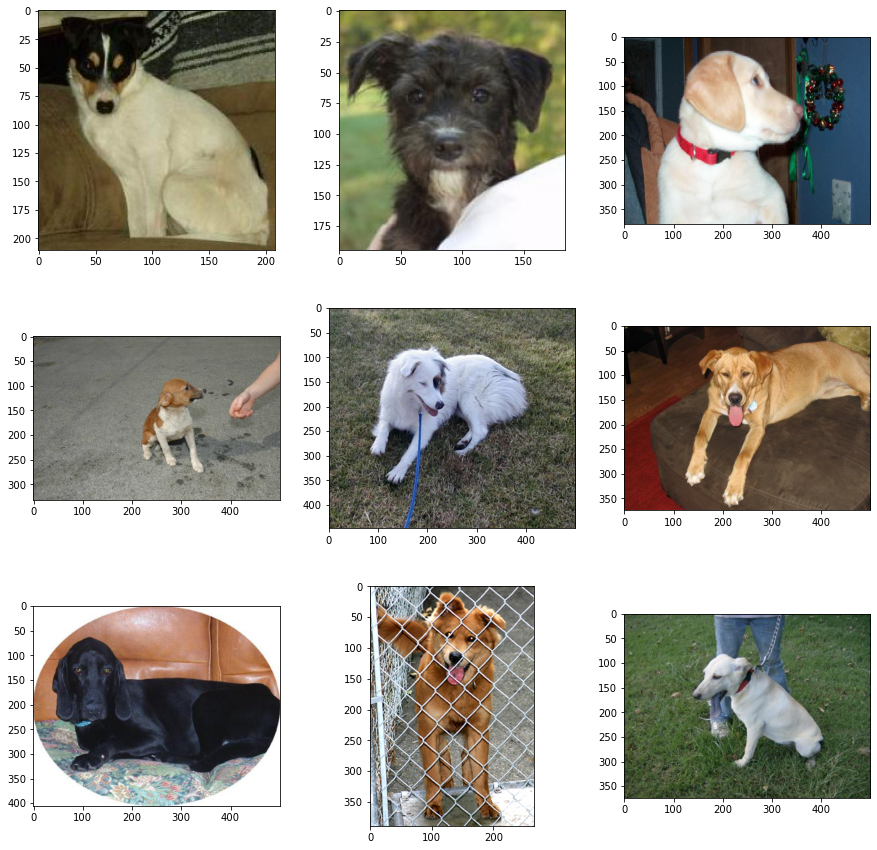

In [21]:
#random file inspection for dogs

plt.figure(figsize=(15,15))


for i in range(9):
    plt.subplot(330+1+i)
    sample = random.randint(0,12498)
    filename = "C:/Users/Claire Robinson/Downloads/AdvancedDS/Dog/" + str(sample) + ".jpg"
    image = imread(filename)
    plt.imshow(image)
    
plt.show()

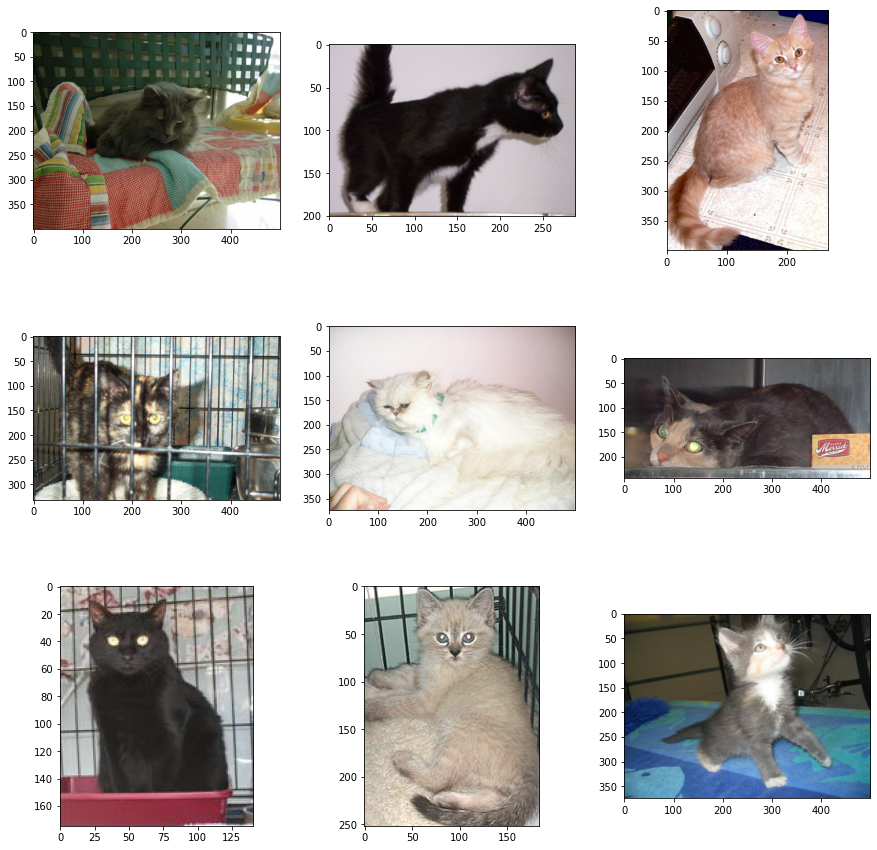

In [31]:
#random file inspection for cats

plt.figure(figsize=(15,15))


for i in range(9):
    plt.subplot(330+1+i)
    sample = random.randint(0,12498)
    filename = "C:/Users/Claire Robinson/Downloads/AdvancedDS/Cat/" + str(sample) + ".jpg"
    image = imread(filename)
    plt.imshow(image)
    
plt.show()

In [33]:
#define function to add labels to data

features = []
labels = []

def preprocessing(folder, label):
    files = os.listdir(folder)
    for file in files:
        image = cv2.imread(folder + file)
        if image is not None:
            image = cv2.resize(image, dsize = (128, 128))
            features.append(image)
            labels.append(label)
            
            
preprocessing(cat_folder + '/', 0)
preprocessing(dog_folder + '/', 1)

In [39]:
#send labels to csv for EDA
df = pd.DataFrame(labels, columns=["labels"])

csv_file_path = 'labels.csv'

df.to_csv(csv_file_path, index=False)

In [41]:
#change the features+labels to arrays for easier manipulation
features_array = np.array(features).astype(np.float32)
labels_array = np.array(labels).astype(np.float32)

In [42]:
features_array.shape

(24913, 128, 128, 3)

In [43]:
labels_array.shape

(24913,)

In [44]:
features[698].dtype

dtype('uint8')

In [52]:
#normalize the data by dividing the pixel arrays by 255
#Common technique when dealing with images in Red,Green,Blue color space
#Range in color intensity from 0-255

normalized = features_array / 255

#Now the pixel color values have been normalized so they are between 0-1
#mutes the colors by A LOT

Text(0.5, 1.0, "It's a Cat!!!")

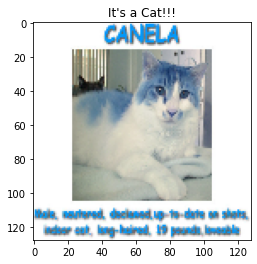

In [97]:
#BLUE CATS AND DOGS!!!

sample = random.randint(0,len(normalized))

image = normalized[sample]
label = labels_array[sample]

if label == 0:
    title = "It's a Cat!!!"
elif label == 1:
    title = "It's a Dog!!!"

image.shape
plt.imshow(image)
plt.title(title)

In [104]:
train_x, test_X, train_y, test_Y = train_test_split(normalized, labels_array, test_size=0.2, shuffle=True)

In [105]:
print(len(train_x))
print(len(test_X))

19930
4983


In [144]:
np.unique(train_x, return_counts=True)

(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
        0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
        0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
        0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
        0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
        0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
        0.27450982, 0.2784314 , 0.28235295, 0.28

In [159]:
train_labels_onehot = to_categorical(train_y)
test_labels_onehot = to_categorical(test_Y)

In [172]:
print(len(test_X), len(test_labels_onehot))

print(test_labels_onehot.shape)

print(test_labels_onehot[500])

print(test_labels_onehot.ndim)



4983 4983
(4983, 2)
[1. 0.]
2


[0. 1.]


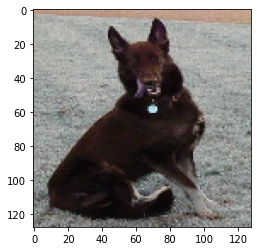

In [191]:
sample = random.randint(0,len(test_X))

image = test_X[sample]
label = test_labels_onehot[sample]

print(label)


image.shape
plt.imshow(image)

#dog is [0. 1.]
# cat is [1. 0.]

# Model Building

In [207]:

# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 return model

In [208]:
model = define_model()

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [199]:
input_shape = train_x[0].shape
model_alex = cnn_alex(input_shape, 2)
model_alex.summary()
history_cnn_alex = model_alex.fit(train_x, train_y, epochs =1000, batch_size = 128)

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [211]:
model = Sequential()

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'